In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
%matplotlib widget

In [8]:
kgy0_sn72 = pd.read_csv('./all_doses/0kGy_sn72.csv')
kgy0_sn72['average'] = kgy0_sn72.mean(axis=1)
wave_no = pd.read_csv('../mdi_optimization/cleaned_csvs/wave_no.csv')

In [9]:
#1175-1770
#1079-1370
amide_wave_no = wave_no.iloc[1079:1370]
amide_spec = kgy0_sn72["0kGy_sn72_rep1"].iloc[1079:1370]

In [13]:
def spec_peaks(spec):
    peak_indeces, params = find_peaks(spec)
    peak_waveno = amide_wave_no.iloc[peak_indeces]
    peaks = spec.iloc[peak_indeces]

    return peak_waveno, peaks

def spec_dip(spec):
    peak_indeces, params = find_peaks(-spec)
    dip_waveno = amide_wave_no.iloc[peak_indeces]
    dips = spec.iloc[peak_indeces]

    return dip_waveno, dips

def annotator_zoom(ax):
    ax.set(ylim=(0, 0.04))
    ax.set(xlim=(1150, 1800))

    # amide 1
    ax.axvspan(1600, 1690, color="#006d2c", alpha=0.55)
    ax.text(1618, 0.035, "Amide I", fontsize=10)

    # amide 2
    ax.axvspan(1480, 1575, color="#31a354", alpha=0.55)
    ax.text(1497, 0.035, "Amide II", fontsize=10)

    # amide 3
    ax.axvspan(1229, 1301, color="#74c476", alpha=0.55)
    ax.text(1231,0.035, "Amide III", fontsize=10)

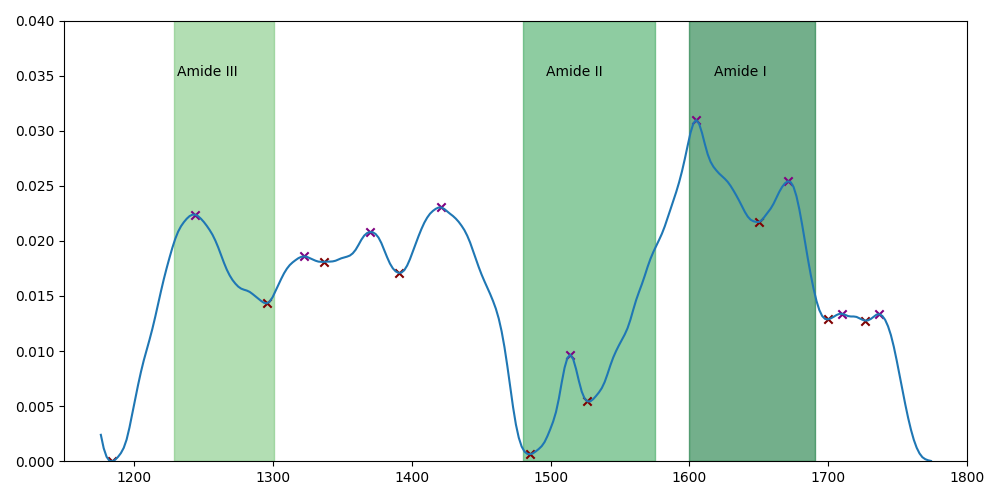

In [14]:
plt.close('all')

spec_fig, axis = plt.subplots(1,1, figsize=(10,5))

annotator_zoom(axis)

waveno_p, spectra_p= spec_peaks(amide_spec)
waveno_d, spectra_d = spec_dip(amide_spec)

axis.plot(amide_wave_no, amide_spec)
axis.scatter(waveno_p, spectra_p, marker='x', color='purple', )
axis.scatter(waveno_d, spectra_d, marker='x', color='maroon', )

# for index, (x, y) in enumerate(zip(waveno_d, spectra_d), start=1):
#     print(index, x, y)
#     #axis.text(x,y, s=f'{index}\n({x},{y})')


spec_fig.tight_layout()